In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [11]:
data1 = pd.read_excel(r"output.xlsx")
print(data1.head(30))

    Unnamed: 0                                            Comment  Sentiment
0            0            مقداد مره يجيب افهمونا ماصط الشعب يحبوش          0
1            1              karim gharbi wmaset sitcom 3ejbetnich          0
2            2                                            mabldou          0
3            3   الهالكا مختصه ااقناه الزيتونه محايده وانتهت م...          0
4            4   اتحاد الخراب والدمار خرب بلد يريدون افريقيا و...          0
5            5                  سلب لفلوسهم خاطر توانسا وفيق سارق          0
6            6               المءسسات الخاصه مصانع يشملهم الاضراب          0
7            7                        يدخل المقروض الاضراب ليتعلم          0
8            8                والخاصه اخاطر يخلصو زوز فرنك السميك          1
9            9                                  اتحاد الخراب نجاح          1
10          10   اطمع نهركم للهاويه بلد شافه الافلاس والاتحاد ...          1
11          11   الاتحاد يتفاوظ تحكو مداخيله الخاصه مشاكل الدو...          0

In [12]:
data1

,Unnamed: 0,Comment,Sentiment
0,0,مقداد مره يجيب افهمونا ماصط الشعب يحبوش,0
1,1,karim gharbi wmaset sitcom 3ejbetnich,0
2,2,mabldou,0
3,3,الهالكا مختصه ااقناه الزيتونه محايده وانتهت م...,0
4,4,اتحاد الخراب والدمار خرب بلد يريدون افريقيا و...,0
5,5,سلب لفلوسهم خاطر توانسا وفيق سارق,0
6,6,المءسسات الخاصه مصانع يشملهم الاضراب,0
7,7,يدخل المقروض الاضراب ليتعلم,0
8,8,والخاصه اخاطر يخلصو زوز فرنك السميك,1
9,9,اتحاد الخراب نجاح,1


In [26]:
my_list=data1['Comment'].tolist()
num_words=0
for sentence in my_list:
    if type(sentence)is str:
        #print(sentence)
        num = len(sentence.split())
        #print(num)
        num_words=num_words+num
print(num_words)

64027


## Feature extraction

In [36]:
def TFIDF(X_train, X_test,MAX_NB_WORDS=20000):
    vectorizer = TfidfVectorizer(max_features=MAX_NB_WORDS)
    vectors = vectorizer.fit_transform(X_train)
    indices = np.argsort(vectorizer.idf_)[::-1]
    features = vectorizer.get_feature_names()
    top_n = 10
    top_features = [features[i] for i in indices[:top_n]]
    print(features)
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()
    print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)


## STEP 4: Création du modèle de Machine Learning

### Deep Learning model with CNN

In [37]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Activation, Dropout, Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import GlobalMaxPooling1D
from tensorflow.python.keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [38]:
feature = data1.Comment.fillna(' ')
target = data1.Sentiment
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2, random_state=42, shuffle=True)

In [39]:
from keras.layers import  Dropout, Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from keras import layers
from sklearn import metrics

In [40]:
def Build_Model_DNN_Text(shape, dropout=0.8):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 60 # number of nodes parfois 64
    nLayers = 2 # number of  hidden layer  2 per default

    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(4, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


In [41]:
X_train_tfidf,X_test_tfidf = TFIDF(X_train,X_test)

['000d', '1024go', '10dinars', '10gen', '10k', '10mlyen', '10w', '10w40', '14معدل', '1500dt', '15سنه', '1er', '1ere', '2000s', '200ti', '200الف', '20ايتري', '20والتكنيك', '23malyoun', '23موتي', '24h', '25go', '27la', '27مارس', '28مارس', '2aktef', '2eme', '2osdom', '3000d', '3000s', '3000ريتهم', '300د', '338d', '34am', '3500x', '350dt', '39ala', '3a9al', '3a9douh', '3a9liya', '3aatyaa', '3ab9rino', '3abbd', '3abir', '3ad', '3adabek', '3afna', '3ahid', '3ahra', '3aila', '3ajifa', '3ajla', '3ala', '3alatounes', '3ale5rr', '3ale9a', '3alem', '3aliyak', '3alk', '3almsata', '3alouch', '3alouwel', '3alya', '3alyhi', '3ambalek', '3ami', '3ammi', '3andnaprocesseur', '3ani', '3anifa', '3annibi', '3ar', '3araslou', '3arassna', '3arbi', '3arbii', '3arbiya', '3arch', '3ared', '3aref', '3aresset', '3arfa', '3arfkom', '3arfou', '3ases', '3aslema', '3atalifoun', '3atba', '3atbet', '3atha9afa', '3atrous', '3attar', '3awd', '3awed', '3awedha', '3aych', '3aycha', '3aychin', '3aychinn', '3aychou', '3aycho

tf-idf with 20000 features


In [42]:
X_train_tfidf[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
X_train_tfidf.shape

(8360, 20000)

In [44]:
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1])
model_DNN.summary()
exit(1)
model_DNN.fit(X_train_tfidf, Y_train,
                              validation_data=(X_test_tfidf, Y_test),
                              validation_split=0.2,
                              epochs=100,
                              batch_size=128,
                              verbose=2,shuffle=True)

predicted = model_DNN.predict_classes(X_test_tfidf)

print(metrics.classification_report(Y_test, predicted))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 60)                1200060   
_________________________________________________________________
dropout_4 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_5 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                

Epoch 70/100
 - 2s - loss: 0.3506 - accuracy: 0.8914 - val_loss: 1.7192 - val_accuracy: 0.7215
Epoch 71/100
 - 3s - loss: 0.3572 - accuracy: 0.8902 - val_loss: 1.7152 - val_accuracy: 0.7258
Epoch 72/100
 - 2s - loss: 0.3508 - accuracy: 0.8939 - val_loss: 1.6653 - val_accuracy: 0.7273
Epoch 73/100
 - 2s - loss: 0.3464 - accuracy: 0.8941 - val_loss: 1.7575 - val_accuracy: 0.7234
Epoch 74/100
 - 2s - loss: 0.3399 - accuracy: 0.8988 - val_loss: 1.8172 - val_accuracy: 0.7225
Epoch 75/100
 - 2s - loss: 0.3282 - accuracy: 0.8989 - val_loss: 1.8721 - val_accuracy: 0.7239
Epoch 76/100
 - 2s - loss: 0.3285 - accuracy: 0.9001 - val_loss: 1.8931 - val_accuracy: 0.7206
Epoch 77/100
 - 2s - loss: 0.3382 - accuracy: 0.8980 - val_loss: 1.9105 - val_accuracy: 0.7258
Epoch 78/100
 - 2s - loss: 0.3252 - accuracy: 0.9004 - val_loss: 1.9210 - val_accuracy: 0.7254
Epoch 79/100
 - 2s - loss: 0.3206 - accuracy: 0.8988 - val_loss: 1.9623 - val_accuracy: 0.7249
Epoch 80/100
 - 2s - loss: 0.3307 - accuracy: 0.90

In [54]:
X_train_tfidf.shape

(8360, 20000)

In [55]:
Y_train.shape

(8360,)

In [56]:
X_test_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
Y_test

318      0
7234     2
4816     2
4419     1
9698     3
1247     2
8887     3
1885     2
3703     1
1536     2
9190     3
6347     1
3894     1
33       0
303      0
1915     2
9496     3
2085     0
4393     1
4782     2
5900     0
3457     1
8121     3
1434     2
9952     3
967      2
35       0
4812     2
8670     3
2619     0
        ..
4993     0
9260     3
7859     3
4720     2
7748     2
5006     0
3891     1
6447     0
5317     0
3105     1
1313     2
7336     2
3070     1
8993     3
3014     1
10258    3
9449     3
653      1
8466     2
8569     3
3527     1
5216     0
6630     0
2484     0
5707     0
3445     1
611      1
8934     3
4514     0
511      0
Name: Sentiment, Length: 2090, dtype: int64

In [44]:
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

### Using a CNN model

In [100]:
# Some handy libraries to build a baseline CNN model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.layers import Activation, GlobalMaxPooling1D
from keras import optimizers
from keras.layers.embeddings import Embedding

In [112]:
from numpy import newaxis

def baseline_cnn_model(fea_matrix, n_class, mode, compiler):
  # create model
    model = Sequential()
    model.add(Conv1D(64,4,input_shape=(100,100), activation = 'relu'))
    model.add(MaxPool1D(pool_size = 4))
    model.add(Conv1D(filters=128, kernel_size = (2), activation = 'relu'))
    model.add(MaxPool1D(pool_size = 4))
    model.add(Flatten())
    model.add(Activation('relu'))
    model.add(Dense(n_class, activation = 'softmax'))
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',  metrics=['acc'])
    #model_ptw2v.add(Dense(1, activation='sigmoid'))

    return model

In [113]:
# Tuning hyper-parameters
import math
print('shape=',X_train_tfidf.shape[1])
lr = math.exp(-3)
batch_size=128
num_epochs=100
decay= math.exp(-4)
mode="reg"
n_class=4 
adm=optimizers.Adam(lr=lr,decay=decay)
sgd=optimizers.SGD(lr=lr, nesterov=True,momentum=0.7,decay=decay)
Nadam= optimizers.Nadam(lr=lr, beta_1=0.9,beta_2=0.999,epsilon=math.exp(-8))

model=baseline_cnn_model(X_train_tfidf,n_class,mode,Nadam)
history = model.fit(X_train_tfidf, Y_train,epochs=10, 
                    validation_data=(X_test_tfidf, Y_test))


shape= 20000


ValueError: Error when checking input: expected conv1d_40_input to have 3 dimensions, but got array with shape (8360, 20000)

In [ ]:

# Model Training
history=model.fit(X_train_tfidf,Y_train,batch_size=batch_size,epochs=num_epochs,verbose=1,validation_split=0.2)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
input_shape = X_train_tfidf.shape  
model.build(input_shape) 

print(model.summary())

In [ ]:
history = model.fit(X_train_tfidf, Y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Deep Learning models using an LSTM

In [27]:
# Import the tools needed from keras
import keras.backend as K
#from keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Dense, Embedding, LSTM
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [28]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [29]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [30]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [31]:
model = Sequential()

In [32]:
model.add(Embedding(len(tokenizer.word_index)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          684064    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 693,572
Trainable params: 693,572
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [35]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, Y_train, 
                    batch_size=32, epochs=20,
                    validation_data=(X_test_seq_padded, Y_test))

ValueError: A target array with shape (8360, 1) was passed for an output of shape (None, 4) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

# Deep Learning Model with CNN

In [114]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X = data1.Comment.fillna(' ')
Y = data1.Sentiment

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

Y = Y.reshape(-1, 1)
Y

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [116]:
# Program to find most frequent 
# element in a list
  
from collections import Counter
  
def most_frequent(List):
    occurence_count = Counter(List)
    #return occurence_count.most_common(1)[0][0]
    return occurence_count.most_common(1)
  
vocab= set(" ".join(X).split())
print(most_frequent(vocab))
print(vocab)

[('القلق', 1)]
{'القلق', 'توصلو', 'barra', 'لعضيم', 'البلاصه', 'elmaghreb', 'sta3ha', 'chtarhoum', 'الدهر', 'بالمرصاد', 'طاءر', 'وبالشفاء', 'لحق', 'متطرف', 'الطحين', 'النبي', 'ya7asra', 't3adit', 'ضغط', 'القريب', 'بروفيسيونال', 'كفوف', 'inshallah', 'جرثومه', 'سروالها', 'مفماش', 'ﺍﻟﺤﻖ', 'الربايه', 'ياخذو', 'لتثبت', 'لتمكين', 'zeied', 'ناقل', 'وادعيلو', 'ma3dnous', 'y9olek', '5stan', 'زهونغ', 'plateau', 'تمدو', 'خشين', 'ااثعالب', 'باول', 'فرنسيه', 'aaa', 'fire', 'successive', 'ichabhou', 'غرار', 'na3tik', 'قلقتو', 'لراسي', 'khyyr', 'kilwa', 'stad3ouk', 'ye5dhek', 'فوطوشب', 'زيك', 'woslet', 'dossier', 'تعديتها', 'موزه', 'avenir', 'رجال', 'gharsallaoui', 'شريف', 'i3lem', 'فتبا', 'مادهم', 'للاستعانه', 'محاكمه', 'وجبت', 'خصوصيه', 'machwim', 'الفصيله', 'mista3mla', 'feteh', 'تمارس', 'وتعامله', 'وضحك', 'فسفس', 'baji', 'مصيبه', 'nokba', 'sacheyet', 'wecha3b', 'ybakki', 'el9alb', 'فكاهي', 'الكلسون', 'كلمه', 'شرفها', 'التاليه', 'travaux', 'غناك', 'effffff', 'كراسي', 'بدي', 'animation', 'نمير', 'و

In [117]:
def word_count(voc):
    counts = dict()
    

    for word in voc:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

vocab= set(" ".join(X).split())
#print( word_count(vocab))

In [118]:
X

0                  مقداد مره يجيب افهمونا ماصط الشعب يحبوش
1                    karim gharbi wmaset sitcom 3ejbetnich
2                                                  mabldou
3         الهالكا مختصه ااقناه الزيتونه محايده وانتهت م...
4         اتحاد الخراب والدمار خرب بلد يريدون افريقيا و...
5                        سلب لفلوسهم خاطر توانسا وفيق سارق
6                     المءسسات الخاصه مصانع يشملهم الاضراب
7                              يدخل المقروض الاضراب ليتعلم
8                      والخاصه اخاطر يخلصو زوز فرنك السميك
9                                        اتحاد الخراب نجاح
10        اطمع نهركم للهاويه بلد شافه الافلاس والاتحاد ...
11        الاتحاد يتفاوظ تحكو مداخيله الخاصه مشاكل الدو...
12                        تشخر زادت بوف يهلك التحاد الخراب
13               مره مالزايد كجيو القحوا اقلك نفاذ المخزون
14        الكميه ناقصه مشطلع سومها الحمد لله مرضنا وبري...
15        تفدليكو ملاين المتحصلين عامين اطيشها الزبله ا...
16                                              لقاح مشك

In [119]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

vocab= set(" ".join(X_train).split())
max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

print(max_words)
print(max_len)
print(len(vocab))
#print(vocab)



22286
4265
22286


In [120]:
vocab2=[]
for word in vocab:
    if len(word)>=3: #or word not in ['1','2','3','4','5','6','7','8','9','0']:
        vocab2.append(word)
print(len(vocab2))
    

22286


In [121]:
import re
vocab3=[]
for w in vocab2:
    vocab3.append(re.sub(r'(.)\1+', r'\1\1', w))
print(len(vocab3))

22286


In [122]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [123]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
#X_train_seq = tokenizer.texts_to_matrix(X_train, mode='freq')
print(X_train_seq.shape)
max_words=len(vocab3)
print(max_words)
print(max_len)
print(type(X_train))

(8882, 4265)
22286
4265
<class 'pandas.core.series.Series'>


In [125]:
print(X_train_seq.shape)

(8882, 4265)


In [126]:
train=X_train.values.tolist()
s=0
for i in range(len(train)):
    #print(train[i])
    s=s+len(train[i])
moy=s/len(train)
print(moy)

39.95699166854312


In [127]:
max_len=40

In [128]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)


In [129]:
X_train_seq[1]

[5775, 1530]

In [130]:
X_train[1]

' karim gharbi wmaset sitcom 3ejbetnich'

In [131]:
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [133]:
X_train_seq[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 5775, 1530])

In [134]:
X_train[2]

' mabldou'

In [135]:
print(X_train_seq[7])
print(X_train[7])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 5788 5789]
 يدخل المقروض الاضراب ليتعلم


In [136]:
Y_train

array([[1],
       [0],
       [3],
       ...,
       [1],
       [2],
       [0]], dtype=int64)

In [137]:
from sklearn.utils import class_weight as cw
# Calculate Class Weights
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

In [138]:
class_weight = get_weight(Y_train.flatten())

In [139]:
class_weight[3]

1.0006759801712484

In [147]:
def get_rnn_model():
    model = Sequential()
    
    model.add(Embedding(max_words, 50, input_length=max_len))
    model.add(LSTM(64))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(4, activation='sigmoid'))
    
    model.summary()
    
    return model


In [151]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,BatchNormalization
model1 = get_rnn_model()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 40, 50)            1114300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_40 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)             

In [152]:
def get_cnn_model():   
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    
    model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(2048, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(4, activation='sigmoid'))
    
    model.summary()
    return model

In [165]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [154]:
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply
from keras.layers import Embedding, LSTM, Bidirectional
from keras.models import Sequential
num_class = 4


In [155]:
loss = 'categorical_crossentropy'
# loss = 'binary_crossentropy' only for binary classification
metrics = ['accuracy']

In [156]:
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 

In [161]:
print(X_train_seq.shape)
print(Y_train.shape)
from keras.utils import to_categorical
train_labels = to_categorical(Y_train)

(8882, 40)
(8882, 1)


In [163]:
import time
import datetime
import keras.callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
import keras

from keras.callbacks import TensorBoard

print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        #min_delta=1e-2,
        min_delta=1,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=90,
        verbose=1,
    )
]

history1 = model1.fit(
    X_train_seq,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split
    #class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2021-08-29 14:46:05


Compliling Model ...

Trainning Model ...

Train on 7105 samples, validate on 1777 samples
Epoch 1/100
7105/7105 [==============================] - 7s 995us/step - loss: 1.6019 - accuracy: 0.2652 - val_loss: 1.3841 - val_accuracy: 0.2555
Epoch 2/100
7105/7105 [==============================] - 5s 635us/step - loss: 1.4641 - accuracy: 0.3049 - val_loss: 1.3814 - val_accuracy: 0.2876
Epoch 3/100
7105/7105 [==============================] - 5s 637us/step - loss: 1.3082 - accuracy: 0.3924 - val_loss: 1.3700 - val_accuracy: 0.3860
Epoch 4/100
7105/7105 [==============================] - 4s 631us/step - loss: 1.1093 - accuracy: 0.5589 - val_loss: 1.3341 - val_accuracy: 0.3579
Epoch 5/100
7105/7105 [==============================] - 5s 637us/step - loss: 0.9215 - accuracy: 0.6973 - val_loss: 1.2546 - val_accuracy: 0.4181
Epoch 6/100
7105/7105 [==============================] - 5s 635us/step - loss: 0.7062 - accuracy: 0.8101 - val_loss: 1.1194 - va

7105/7105 [==============================] - 4s 631us/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 1.3650 - val_accuracy: 0.7107
Epoch 56/100
7105/7105 [==============================] - 4s 625us/step - loss: 0.0448 - accuracy: 0.9869 - val_loss: 1.3793 - val_accuracy: 0.7012
Epoch 57/100
7105/7105 [==============================] - 4s 629us/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 1.4444 - val_accuracy: 0.6916
Epoch 58/100
7105/7105 [==============================] - 4s 623us/step - loss: 0.0367 - accuracy: 0.9892 - val_loss: 1.3629 - val_accuracy: 0.6989
Epoch 59/100
7105/7105 [==============================] - 5s 640us/step - loss: 0.0435 - accuracy: 0.9852 - val_loss: 1.3755 - val_accuracy: 0.6950
Epoch 60/100
7105/7105 [==============================] - 4s 633us/step - loss: 0.0430 - accuracy: 0.9882 - val_loss: 1.3661 - val_accuracy: 0.6978
Epoch 61/100
7105/7105 [==============================] - 4s 633us/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 1.4293 

In [162]:
train_labels

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

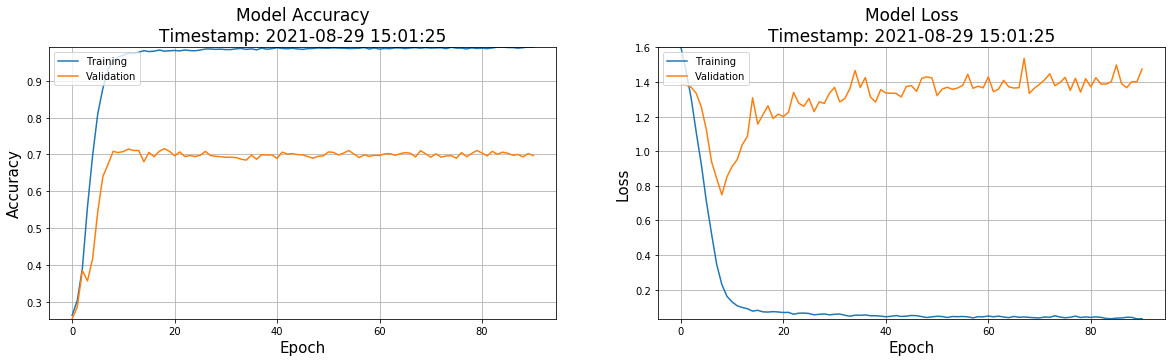

In [166]:
plot_performance(history=history1)

In [167]:
num_class = 4
model2 = get_cnn_model()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 40, 100)           2228600   
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 38, 1024)          308224    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_44 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 2048)            

In [168]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        #min_delta=1e-2,
        min_delta=1,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=90,
        verbose=1,
    )
]

history2 = model2.fit(
    X_train_seq,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split
    #class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2021-08-29 15:02:10


Compliling Model ...

Trainning Model ...

Train on 7105 samples, validate on 1777 samples
Epoch 1/100
7105/7105 [==============================] - 16s 2ms/step - loss: 1.5386 - accuracy: 0.3112 - val_loss: 1.3797 - val_accuracy: 0.3376
Epoch 2/100
7105/7105 [==============================] - 14s 2ms/step - loss: 1.2465 - accuracy: 0.4874 - val_loss: 1.3683 - val_accuracy: 0.4147
Epoch 3/100
7105/7105 [==============================] - 14s 2ms/step - loss: 0.9065 - accuracy: 0.7001 - val_loss: 1.2834 - val_accuracy: 0.5256
Epoch 4/100
7105/7105 [==============================] - 14s 2ms/step - loss: 0.5479 - accuracy: 0.8455 - val_loss: 1.0254 - val_accuracy: 0.5971
Epoch 5/100
7105/7105 [==============================] - 14s 2ms/step - loss: 0.3040 - accuracy: 0.9163 - val_loss: 0.9085 - val_accuracy: 0.6410
Epoch 6/100
7105/7105 [==============================] - 14s 2ms/step - loss: 0.1738 - accuracy: 0.9460 - val_loss: 0.8371 - val_accu

Epoch 56/100
7105/7105 [==============================] - 14s 2ms/step - loss: 0.0239 - accuracy: 0.9918 - val_loss: 1.8228 - val_accuracy: 0.7175
Epoch 57/100
7105/7105 [==============================] - 15s 2ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 1.8243 - val_accuracy: 0.7231
Epoch 58/100
7105/7105 [==============================] - 15s 2ms/step - loss: 0.0265 - accuracy: 0.9906 - val_loss: 1.9165 - val_accuracy: 0.7119
Epoch 59/100
7105/7105 [==============================] - 15s 2ms/step - loss: 0.0232 - accuracy: 0.9911 - val_loss: 1.9020 - val_accuracy: 0.7147
Epoch 60/100
7105/7105 [==============================] - 16s 2ms/step - loss: 0.0272 - accuracy: 0.9901 - val_loss: 1.9085 - val_accuracy: 0.7169
Epoch 61/100
7105/7105 [==============================] - 15s 2ms/step - loss: 0.0236 - accuracy: 0.9913 - val_loss: 1.9300 - val_accuracy: 0.7226
Epoch 62/100
7105/7105 [==============================] - 15s 2ms/step - loss: 0.0241 - accuracy: 0.9899 - val_loss: 1

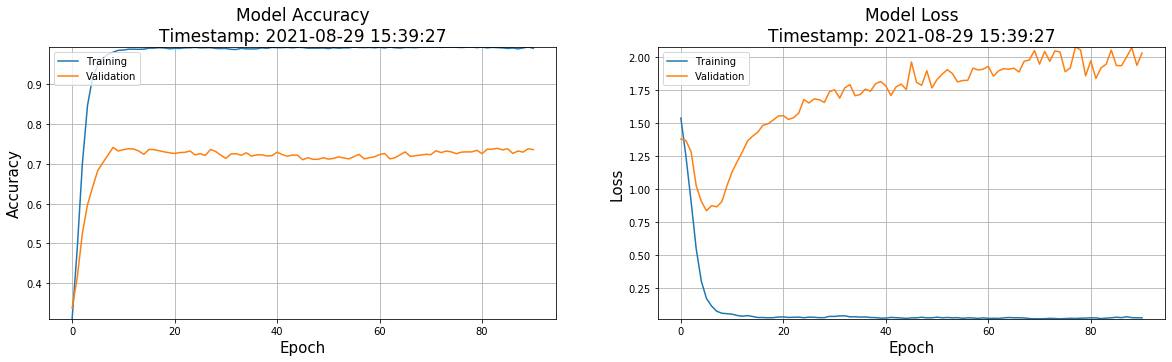

In [169]:
plot_performance(history=history2)

In [171]:
print(X_train_seq.shape)
print(Y_train.shape)
from keras.utils import to_categorical
train_test_labels = to_categorical(Y_test)

(8882, 40)
(8882, 1)


In [172]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
accuracy1 = model1.evaluate(test_X_seq, train_test_labels)
accuracy2 = model2.evaluate(test_X_seq, train_test_labels)

1568/1568 [==============================] - 1s 609us/step


In [173]:
print("Model Performance of RNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy1[1]*100, accuracy1[0]))

print("\nModel Performance of RNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy2[1]*100, accuracy2[0]))

Model Performance of RNN (Test Accuracy):
Accuracy: 70.47%
Loss: 1.599


Model Performance of RNN (Test Accuracy):
v: 72.32%
Loss: 2.044



In [174]:
ypreds1 = model1.predict_classes(test_X_seq, verbose=1)
ypreds2 = model2.predict_classes(test_X_seq, verbose=1)

1568/1568 [==============================] - 1s 893us/step


In [175]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

In [180]:
!pip install --upgrade scikit

  ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [179]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Y_test, ypreds1, title="RNN")

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [181]:
result = pd.DataFrame({'model': 'RNN', 'score': accuracy1[1]*100}, index=[-1])
row2 = pd.DataFrame({'model': 'CNN', 'score': accuracy2[1]*100}, index=[-1])
result = pd.concat([row2, result.ix[:]]).reset_index(drop=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [182]:
plot_model_performace(result)

NameError: name 'sns' is not defined